In [ ]:
# Montamos Google Drive para poder utilizar los df
# Previamente limpiados 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline

In [ ]:
# Importamos librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from matplotlib.pylab import figure

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IronHack/Data Analysis/Bootcamp/Proyecto Final/datasetbueno.csv')

In [ ]:
df.head()

,Country name,Year,Adjusted net national income per capita (current US$),Changes in inventories (current US$),"Current account balance (BoP, current US$)",Exports of goods and services (current US$),External balance on goods and services (current US$),"Foreign direct investment, net outflows (BoP, current US$)",GDP (current US$),GDP per capita (current US$),Gross national expenditure (current US$),Gross savings (% of GDP),Imports of goods and services (current US$),"Industry (including construction), value added (current US$)","International tourism, receipts (current US$)",Market capitalization of listed domestic companies (current US$),"Personal remittances, paid (current US$)","Personal remittances, received (current US$)","Portfolio equity, net inflows (BoP, current US$)","Portfolio investment, bonds (PPG + PNG) (NFL, current US$)","Portfolio investment, net (BoP, current US$)",Pump price for gasoline (US$ per liter),"Service exports (BoP, current US$)","Service imports (BoP, current US$)","Stocks traded, total value (current US$)","Total reserves (includes gold, current US$)",Total reserves minus gold (current US$),"Use of IMF credit (DOD, current US$)",Value
0,Afghanistan,1990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,637925667,266400667,0,0.0
1,Afghanistan,2000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,Afghanistan,2008,0,0,-238376258,0,0,-1918036,10109225813,364,0,0,0,2720961613,36000000,0,216603835,89540435,0,0,0,1,1290614791,752648599,0,3042274496,2430835946,131081597,0.0
3,Afghanistan,2009,411,0,277627586,0,0,247111,12439087076,438,0,0,0,2723802098,89000000,0,624996676,140695166,0,0,0,0,1701821054,851205292,0,4265888740,3501370863,352752616,0.0
4,Afghanistan,2010,511,0,-577708206,0,0,-1248047,15856574731,543,0,0,0,3353890829,147000000,0,788698416,378206657,0,0,9981996,1,2130237964,1083164710,0,5162440806,4174367357,355229891,0.0


In [ ]:
df['Year'].unique()

array([1990, 2000, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 29 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Country name                                                      2520 non-null   object 
 1   Year                                                              2520 non-null   int64  
 2   Adjusted net national income per capita (current US$)             2520 non-null   int64  
 3   Changes in inventories (current US$)                              2520 non-null   int64  
 4   Current account balance (BoP, current US$)                        2520 non-null   int64  
 5   Exports of goods and services (current US$)                       2520 non-null   int64  
 6   External balance on goods and services (current US$)              2520 non-null   int64  
 7   Foreign direct investment, net ou

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,2520.0,2.009583e+03,7.321042e+00,1.990000e+03,2.008750e+03,2.011500e+03,2.014250e+03,2.017000e+03
Adjusted net national income per capita (current US$),2520.0,7.945800e+03,1.308138e+04,0.000000e+00,4.557500e+02,2.498000e+03,8.049500e+03,8.216200e+04
Changes in inventories (current US$),2520.0,2.536270e+09,1.316957e+10,-1.507720e+11,0.000000e+00,2.357841e+07,7.654795e+08,2.113483e+11
"Current account balance (BoP, current US$)",2520.0,6.735670e+08,4.142228e+10,-6.965260e+11,-1.261513e+09,-9.612328e+07,2.732850e+07,4.205685e+11
Exports of goods and services (current US$),2520.0,8.728146e+10,2.518180e+11,0.000000e+00,6.393323e+08,5.772846e+09,4.797096e+10,2.462839e+12
External balance on goods and services (current US$),2520.0,2.169468e+09,4.592629e+10,-7.230880e+11,-1.883184e+09,-1.031703e+08,8.300434e+08,3.588357e+11
"Foreign direct investment, net outflows (BoP, current US$)",2520.0,8.265206e+09,3.646145e+10,-1.139153e+11,0.000000e+00,1.361451e+07,6.956046e+08,4.366160e+11
GDP (current US$),2520.0,3.083146e+11,1.331010e+12,0.000000e+00,3.518083e+09,1.776733e+10,1.207363e+11,1.954298e+13
GDP per capita (current US$),2520.0,1.489092e+04,2.400522e+04,0.000000e+00,1.290000e+03,4.646500e+03,1.752500e+04,1.894320e+05
Gross national expenditure (current US$),2520.0,3.048866e+11,1.351130e+12,0.000000e+00,1.632657e+09,1.565333e+10,1.140463e+11,2.009851e+13


In [ ]:
# Creamos una matriz de correlación para estudiar la colinaridad
corr_matrix = df.corr()
corr_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Year to Value
Data columns (total 28 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Year                                                              28 non-null     float64
 1   Adjusted net national income per capita (current US$)             28 non-null     float64
 2   Changes in inventories (current US$)                              28 non-null     float64
 3   Current account balance (BoP, current US$)                        28 non-null     float64
 4   Exports of goods and services (current US$)                       28 non-null     float64
 5   External balance on goods and services (current US$)              28 non-null     float64
 6   Foreign direct investment, net outflows (BoP, current US$)        28 non-null     float64
 7   GDP (current US$)                   

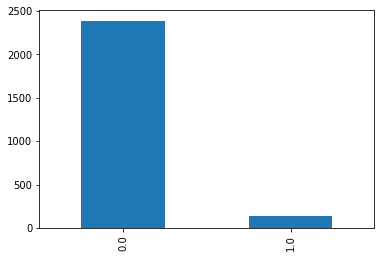

In [ ]:
# Graficamos nuestra variable a predecir
# Observamos que nuestro dataset está desbalanceado
df['Value'].value_counts().plot.bar()
plt.show()

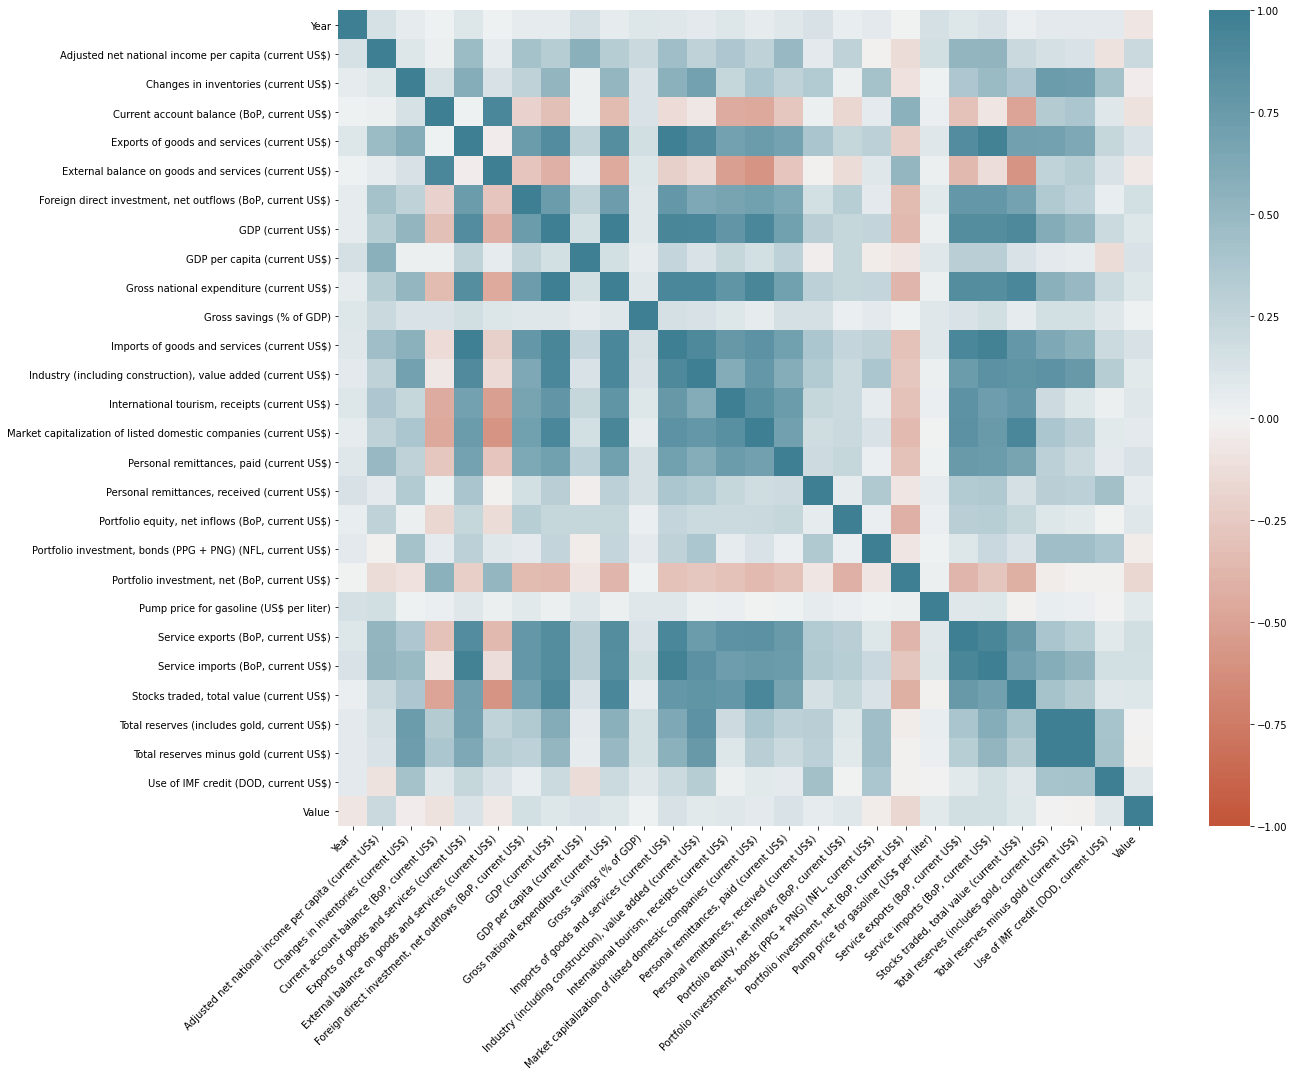

In [ ]:
# Creamos un heatmap para visualizar de mejor manera las correlaciones
# Y saber si necesitamos deshacernos de algunas variables y no tener overfitting
# No obstante, podemos observar que no hay colinaridad entre las variables
# Por lo que podremos utilziar el set de datos sin temas

fig, ax = plt.subplots(figsize=(20,15))

ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

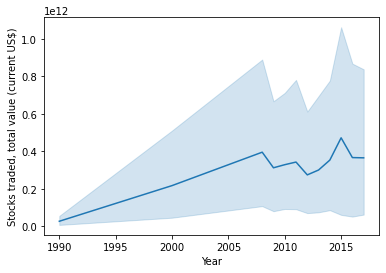

In [ ]:
sns.lineplot(data=df, x='Year', y='Stocks traded, total value (current US$)')

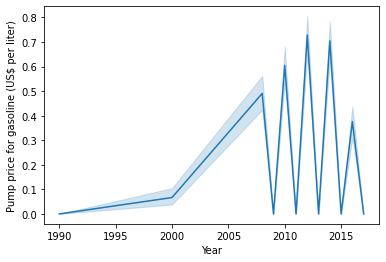

In [ ]:
sns.lineplot(data=df, x='Year', y='Pump price for gasoline (US$ per liter)')

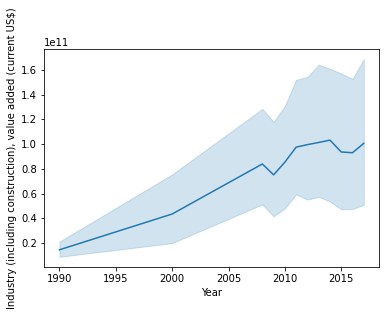

In [ ]:
sns.lineplot(data=df, x='Year', y='Industry (including construction), value added (current US$)')

In [ ]:
global_indicators = pd.read_csv('/content/drive/MyDrive/IronHack/Data Analysis/Bootcamp/Proyecto Final/Backups/ProyectoFinal.csv')

In [ ]:
global_indicators.head()

,Country name,Year,Adjusted net national income per capita (current US$),Changes in inventories (current US$),"Current account balance (BoP, current US$)",Exports of goods and services (current US$),External balance on goods and services (current US$),"Foreign direct investment, net outflows (BoP, current US$)",GDP (current US$),GDP per capita (current US$),Gross national expenditure (current US$),Gross savings (% of GDP),Imports of goods and services (current US$),"Industry (including construction), value added (current US$)","International tourism, receipts (current US$)",Market capitalization of listed domestic companies (current US$),"Personal remittances, paid (current US$)","Personal remittances, received (current US$)","Portfolio equity, net inflows (BoP, current US$)","Portfolio investment, bonds (PPG + PNG) (NFL, current US$)","Portfolio investment, net (BoP, current US$)",Pump price for gasoline (US$ per liter),"Service exports (BoP, current US$)","Service imports (BoP, current US$)","Stocks traded, total value (current US$)","Total reserves (includes gold, current US$)",Total reserves minus gold (current US$),"Use of IMF credit (DOD, current US$)"
0,Afghanistan,1990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,637925667,266400667,0
1,Afghanistan,1991,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,576118920,234894920,0
2,Afghanistan,1992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Afghanistan,1993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Afghanistan,1994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


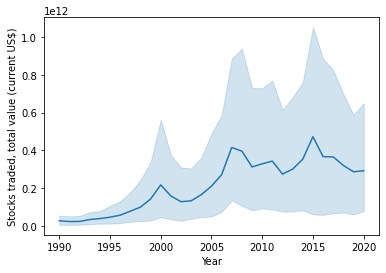

In [ ]:
sns.lineplot(data=global_indicators, x='Year', y='Stocks traded, total value (current US$)')

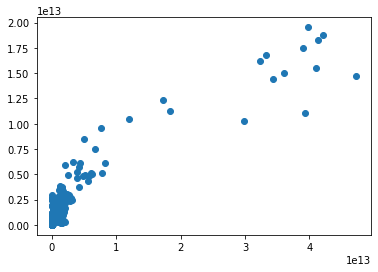

In [ ]:
plt.scatter(df['Stocks traded, total value (current US$)'],df['GDP (current US$)'])

In [ ]:
n_countries = df['Country name'].unique()
len(n_countries)

210

In [ ]:
# Países con mayor incidencia de crisis

df[['Value','Country name']].value_counts()

Value  Country name 
0.0    Myanmar          12
       Poland           12
       Lithuania        12
       Liechtenstein    12
       Libya            12
                        ..
1.0    Lebanon           1
       Kazakhstan        1
       Jordan            1
       Japan             1
       Philippines       1
Length: 264, dtype: int64

In [ ]:
# Filtramos entre los países que han tenido incidencias 
# 0 = no banking crisis // 1 = banking crisis
no_crisis = df[(df['Value']==0)]
crisis = df[(df['Value']==1)]

In [ ]:
# Seleccionamos los valores únicos de los países
# Transformamos a lista ese susbset para poder iterar después
no_crisis_countries = no_crisis['Country name'].unique()
no_crisis_countries = no_crisis_countries.tolist()
no_crisis_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Gabon',
 'Gambia, The',
 'Georgia'

In [ ]:
# Hacemos lo mismo con la lista de países que han tenido crisis
crisis_countries = crisis['Country name'].unique()
crisis_countries = crisis_countries.tolist()
crisis_countries

['Algeria',
 'Argentina',
 'Austria',
 'Belgium',
 'Benin',
 'Brazil',
 'Burkina Faso',
 'Cameroon',
 'Colombia',
 'Costa Rica',
 "Cote d'Ivoire",
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Ecuador',
 'El Salvador',
 'France',
 'Germany',
 'Greece',
 'Guinea-Bissau',
 'Hungary',
 'Iceland',
 'Indonesia',
 'Ireland',
 'Italy',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Latvia',
 'Lebanon',
 'Luxembourg',
 'Mali',
 'Moldova',
 'Mongolia',
 'Mozambique',
 'Netherlands',
 'Nicaragua',
 'Nigeria',
 'Philippines',
 'Portugal',
 'Russian Federation',
 'Senegal',
 'Sierra Leone',
 'Slovak Republic',
 'Slovenia',
 'Spain',
 'Sri Lanka',
 'Sweden',
 'Switzerland',
 'Thailand',
 'Turkey',
 'Ukraine',
 'United Kingdom',
 'United States']

In [ ]:
no_crisis_countriestableau = global_indicators.loc[global_indicators.apply(lambda x: x['Country name'] in no_crisis_countries, axis=1)]

In [ ]:
crisis_countriestableau = global_indicators.loc[global_indicators.apply(lambda x: x['Country name'] in crisis_countries, axis=1)]

In [ ]:
# Exportamos los subsets creados para poder graficar en Tableau
# crisis_countriestableau.to_csv('crisis_countries_plot_tableau.csv', index=False)
# no_crisis_countriestableau.to_csv('no_crisis_countries_plot_tableau.csv', index=False)

# Model Testing

In [ ]:
df_test = pd.get_dummies(df, columns=['Country name'])
df_test.head()

,Year,Adjusted net national income per capita (current US$),Changes in inventories (current US$),"Current account balance (BoP, current US$)",Exports of goods and services (current US$),External balance on goods and services (current US$),"Foreign direct investment, net outflows (BoP, current US$)",GDP (current US$),GDP per capita (current US$),Gross national expenditure (current US$),Gross savings (% of GDP),Imports of goods and services (current US$),"Industry (including construction), value added (current US$)","International tourism, receipts (current US$)",Market capitalization of listed domestic companies (current US$),"Personal remittances, paid (current US$)","Personal remittances, received (current US$)","Portfolio equity, net inflows (BoP, current US$)","Portfolio investment, bonds (PPG + PNG) (NFL, current US$)","Portfolio investment, net (BoP, current US$)",Pump price for gasoline (US$ per liter),"Service exports (BoP, current US$)","Service imports (BoP, current US$)","Stocks traded, total value (current US$)","Total reserves (includes gold, current US$)",Total reserves minus gold (current US$),"Use of IMF credit (DOD, current US$)",Value,Country name_Afghanistan,Country name_Albania,Country name_Algeria,Country name_Andorra,Country name_Angola,Country name_Antigua and Barbuda,Country name_Argentina,Country name_Armenia,Country name_Aruba,Country name_Australia,Country name_Austria,Country name_Azerbaijan,...,Country name_Somalia,Country name_South Africa,Country name_South Sudan,Country name_Spain,Country name_Sri Lanka,Country name_St. Kitts and Nevis,Country name_St. Lucia,Country name_St. Vincent and the Grenadines,Country name_Sudan,Country name_Suriname,Country name_Sweden,Country name_Switzerland,Country name_Syrian Arab Republic,Country name_Tajikistan,Country name_Tanzania,Country name_Thailand,Country name_Timor-Leste,Country name_Togo,Country name_Tonga,Country name_Trinidad and Tobago,Country name_Tunisia,Country name_Turkey,Country name_Turkmenistan,Country name_Turks and Caicos Islands,Country name_Tuvalu,Country name_Uganda,Country name_Ukraine,Country name_United Arab Emirates,Country name_United Kingdom,Country name_United States,Country name_Uruguay,Country name_Uzbekistan,Country name_Vanuatu,"Country name_Venezuela, RB",Country name_Vietnam,Country name_Virgin Islands (U.S.),Country name_West Bank and Gaza,"Country name_Yemen, Rep.",Country name_Zambia,Country name_Zimbabwe
0,1990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,637925667,266400667,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2008,0,0,-238376258,0,0,-1918036,10109225813,364,0,0,0,2720961613,36000000,0,216603835,89540435,0,0,0,1,1290614791,752648599,0,3042274496,2430835946,131081597,0.0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2009,411,0,277627586,0,0,247111,12439087076,438,0,0,0,2723802098,89000000,0,624996676,140695166,0,0,0,0,1701821054,851205292,0,4265888740,3501370863,352752616,0.0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2010,511,0,-577708206,0,0,-1248047,15856574731,543,0,0,0,3353890829,147000000,0,788698416,378206657,0,0,9981996,1,2130237964,1083164710,0,5162440806,4174367357,355229891,0.0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


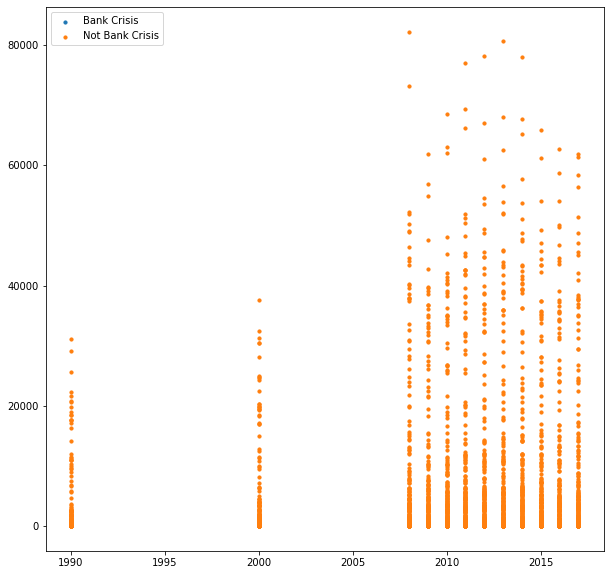

In [ ]:
# Prepare the dataset for a ML first train and test
# We will test a LogistRegression in this one

# X = feature values, all the columns excep the last column

X = df_test.iloc[:, :-1]

# y = target values, last column of the data frame

y = df_test.iloc[:, -1]

# Filter out the countries that got a bank crisis

bank_crisis = df_test.loc[ y == 1]

# Filter out the applicants that din't get admission
not_bank_crisis = df_test.loc[y == 0]

# plots

from matplotlib.pyplot import figure

figure(figsize=(10, 10))
plt.scatter(bank_crisis.iloc[:,0], bank_crisis.iloc[:, 1], s=10, label='Bank Crisis')
plt.scatter(not_bank_crisis.iloc[:,0], not_bank_crisis.iloc[:,1], s=10, label='Not Bank Crisis')
plt.legend()
plt.show()

In [ ]:
# import model and matrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [ ]:
model1 = LogisticRegression(class_weight='balanced', solver='liblinear')

In [ ]:
X = df_test.drop(['Value'], axis=1)

y = df_test['Value']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80)

In [ ]:
# Fit model
model1.fit(X_train, y_train)

# Test

y_pred = model1.predict(X_test)


# Performance

print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.5793650793650794
Confusion Matrix: 
[[266 205]
 [  7  26]]
Area Under Curve: 0.6763173132599885
Recall score: 0.7878787878787878


In [ ]:
# Use score method to get accuracy of model
score = model1.score(X_test, y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
# Look at classification report to evaluate the model
print(classification_report(y_test, y_pred))

Accuracy Score:  0.5793650793650794
--------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.97      0.56      0.72       471
         1.0       0.11      0.79      0.20        33

    accuracy                           0.58       504
   macro avg       0.54      0.68      0.46       504
weighted avg       0.92      0.58      0.68       504



## Repeat the model using over and under sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# instantiating over and under sampler

over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)

# first performing oversampling to minority class

X_over, y_over = over.fit_resample(X, y)
print(f"Oversampled: {Counter(y_over)}")


# now to comine under sampling 
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)

print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")


Oversampled: Counter({0.0: 2387, 1.0: 1193})
Combined Random Sampling: Counter({0.0: 1491, 1.0: 1193})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_combined_sampling, y_combined_sampling, train_size=.80)

In [ ]:
# Fit model
model1.fit(X_train, y_train)

# Test

y_pred = model1.predict(X_test)


# Performance

print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.7057728119180633
Confusion Matrix: 
[[178 113]
 [ 45 201]]
Area Under Curve: 0.7143785097644791
Recall score: 0.8170731707317073


In [ ]:
# Use score method to get accuracy of model
score = model1.score(X_test, y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
# Look at classification report to evaluate the model
print(classification_report(y_test, y_pred))

Accuracy Score:  0.7057728119180633
--------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.80      0.61      0.69       291
         1.0       0.64      0.82      0.72       246

    accuracy                           0.71       537
   macro avg       0.72      0.71      0.71       537
weighted avg       0.73      0.71      0.70       537



### Model 2 - Subsetting the original df

In [ ]:
model2 = LogisticRegression(class_weight='balanced', solver='liblinear')

In [ ]:
df_test.head()

,Year,Adjusted net national income per capita (current US$),Changes in inventories (current US$),"Current account balance (BoP, current US$)",Exports of goods and services (current US$),External balance on goods and services (current US$),"Foreign direct investment, net outflows (BoP, current US$)",GDP (current US$),GDP per capita (current US$),Gross national expenditure (current US$),Gross savings (% of GDP),Imports of goods and services (current US$),"Industry (including construction), value added (current US$)","International tourism, receipts (current US$)",Market capitalization of listed domestic companies (current US$),"Personal remittances, paid (current US$)","Personal remittances, received (current US$)","Portfolio equity, net inflows (BoP, current US$)","Portfolio investment, bonds (PPG + PNG) (NFL, current US$)","Portfolio investment, net (BoP, current US$)",Pump price for gasoline (US$ per liter),"Service exports (BoP, current US$)","Service imports (BoP, current US$)","Stocks traded, total value (current US$)","Total reserves (includes gold, current US$)",Total reserves minus gold (current US$),"Use of IMF credit (DOD, current US$)",Value,Country name_Afghanistan,Country name_Albania,Country name_Algeria,Country name_Andorra,Country name_Angola,Country name_Antigua and Barbuda,Country name_Argentina,Country name_Armenia,Country name_Aruba,Country name_Australia,Country name_Austria,Country name_Azerbaijan,...,Country name_Somalia,Country name_South Africa,Country name_South Sudan,Country name_Spain,Country name_Sri Lanka,Country name_St. Kitts and Nevis,Country name_St. Lucia,Country name_St. Vincent and the Grenadines,Country name_Sudan,Country name_Suriname,Country name_Sweden,Country name_Switzerland,Country name_Syrian Arab Republic,Country name_Tajikistan,Country name_Tanzania,Country name_Thailand,Country name_Timor-Leste,Country name_Togo,Country name_Tonga,Country name_Trinidad and Tobago,Country name_Tunisia,Country name_Turkey,Country name_Turkmenistan,Country name_Turks and Caicos Islands,Country name_Tuvalu,Country name_Uganda,Country name_Ukraine,Country name_United Arab Emirates,Country name_United Kingdom,Country name_United States,Country name_Uruguay,Country name_Uzbekistan,Country name_Vanuatu,"Country name_Venezuela, RB",Country name_Vietnam,Country name_Virgin Islands (U.S.),Country name_West Bank and Gaza,"Country name_Yemen, Rep.",Country name_Zambia,Country name_Zimbabwe
0,1990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,637925667,266400667,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2008,0,0,-238376258,0,0,-1918036,10109225813,364,0,0,0,2720961613,36000000,0,216603835,89540435,0,0,0,1,1290614791,752648599,0,3042274496,2430835946,131081597,0.0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2009,411,0,277627586,0,0,247111,12439087076,438,0,0,0,2723802098,89000000,0,624996676,140695166,0,0,0,0,1701821054,851205292,0,4265888740,3501370863,352752616,0.0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2010,511,0,-577708206,0,0,-1248047,15856574731,543,0,0,0,3353890829,147000000,0,788698416,378206657,0,0,9981996,1,2130237964,1083164710,0,5162440806,4174367357,355229891,0.0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Divide the df into dependent variable and independent

X2 = df_test.drop(['Value','Pump price for gasoline (US$ per liter)','Gross savings (% of GDP)'], axis=1)

y2 = df_test['Value']

In [ ]:
# instantiating over and under sampler

over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)

# first performing oversampling to minority class

X_over, y_over = over.fit_resample(X2, y2)
print(f"Oversampled: {Counter(y_over)}")


# now to comine under sampling 
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)

print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")


Oversampled: Counter({0.0: 2387, 1.0: 1193})
Combined Random Sampling: Counter({0.0: 1491, 1.0: 1193})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_combined_sampling, y_combined_sampling, train_size=.80)

In [ ]:
# Fit model
model2.fit(X_train, y_train)

# Test

y_pred = model2.predict(X_test)


# Performance

print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.6908752327746741
Confusion Matrix: 
[[163 111]
 [ 55 208]]
Area Under Curve: 0.6928825178318669
Recall score: 0.7908745247148289


In [ ]:
# Use score method to get accuracy of model
score = model2.score(X_test, y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
# Look at classification report to evaluate the model
print(classification_report(y_test, y_pred))

Accuracy Score:  0.6908752327746741
--------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.75      0.59      0.66       274
         1.0       0.65      0.79      0.71       263

    accuracy                           0.69       537
   macro avg       0.70      0.69      0.69       537
weighted avg       0.70      0.69      0.69       537



### Model 3 - Decision Tree

In [ ]:
#Import required module
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# Separamos la clases/etiquetas

class_0 = df_test[(df_test['Value']==0)].to_numpy()
class_1 = df_test[(df_test['Value']==1)].to_numpy()

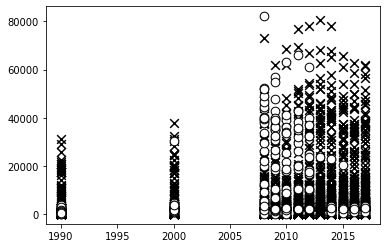

In [ ]:
fig = plt.figure(facecolor='w')

plt.scatter(class_0[:,0],class_0[:,1], s=75, facecolor='black', edgecolors = 'black', marker='x')
plt.scatter(class_1[:,0],class_1[:,1], s=75, facecolor='white', edgecolors = 'black', marker='o')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_combined_sampling, y_combined_sampling, train_size=.80)

In [ ]:
classifier = DecisionTreeClassifier(random_state=0, max_depth=4)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
def visualize_classifier(classifier, X, y, title=''):
  #obteniendo nuestro min y max para el arange
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    
    # paso que tomara nuestro grid
    mesh_step_size = 0.01
    
    # Define the mesh grid of X and Y values
    #manera automatica de crear un grid para nuestro rango de datos
    #x_vals convierte nustro arreglo de 2D en uno de 1D,
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))
    
    #Ejecutando neustro modelo para los valores
    #Ravel permite convertir el arerglo a 1 D
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    
    # Cambiamos el tamoño de nuestro output 
    output = output.reshape(x_vals.shape)
    
    # Create a plot
    plt.figure()
    
    # Specify the title
    plt.title(title)
    
    # Creamos el color de nustra grafica. Practicamente es estar mapeando los limites de donde a donde
    #va a colorear y los colores o escalara de colores la determinamos en cmap
    # Colores secuenciales, divergentes, etc...
    #https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.hot)
    
    # Crea un scatterplot con cada valor de X y y, color del marker
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)
    
    # Especigicamos de donde a donde va nuestro plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())
    
    # Especificamos marcador en nuestro eje x y y.
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))
    
    plt.show()

In [ ]:
# visualize_classifier(classifier, X_train, y_train, 'Training Dataset')

In [ ]:
classifier.score(X_test,y_test)

0.8324022346368715

In [ ]:
# Obtenemos los feature names para nuestro árbol

model1.feature_names = list(X.columns.values)

In [ ]:
# Get the feature names back from the model

f_names = [x for x in X2.columns]

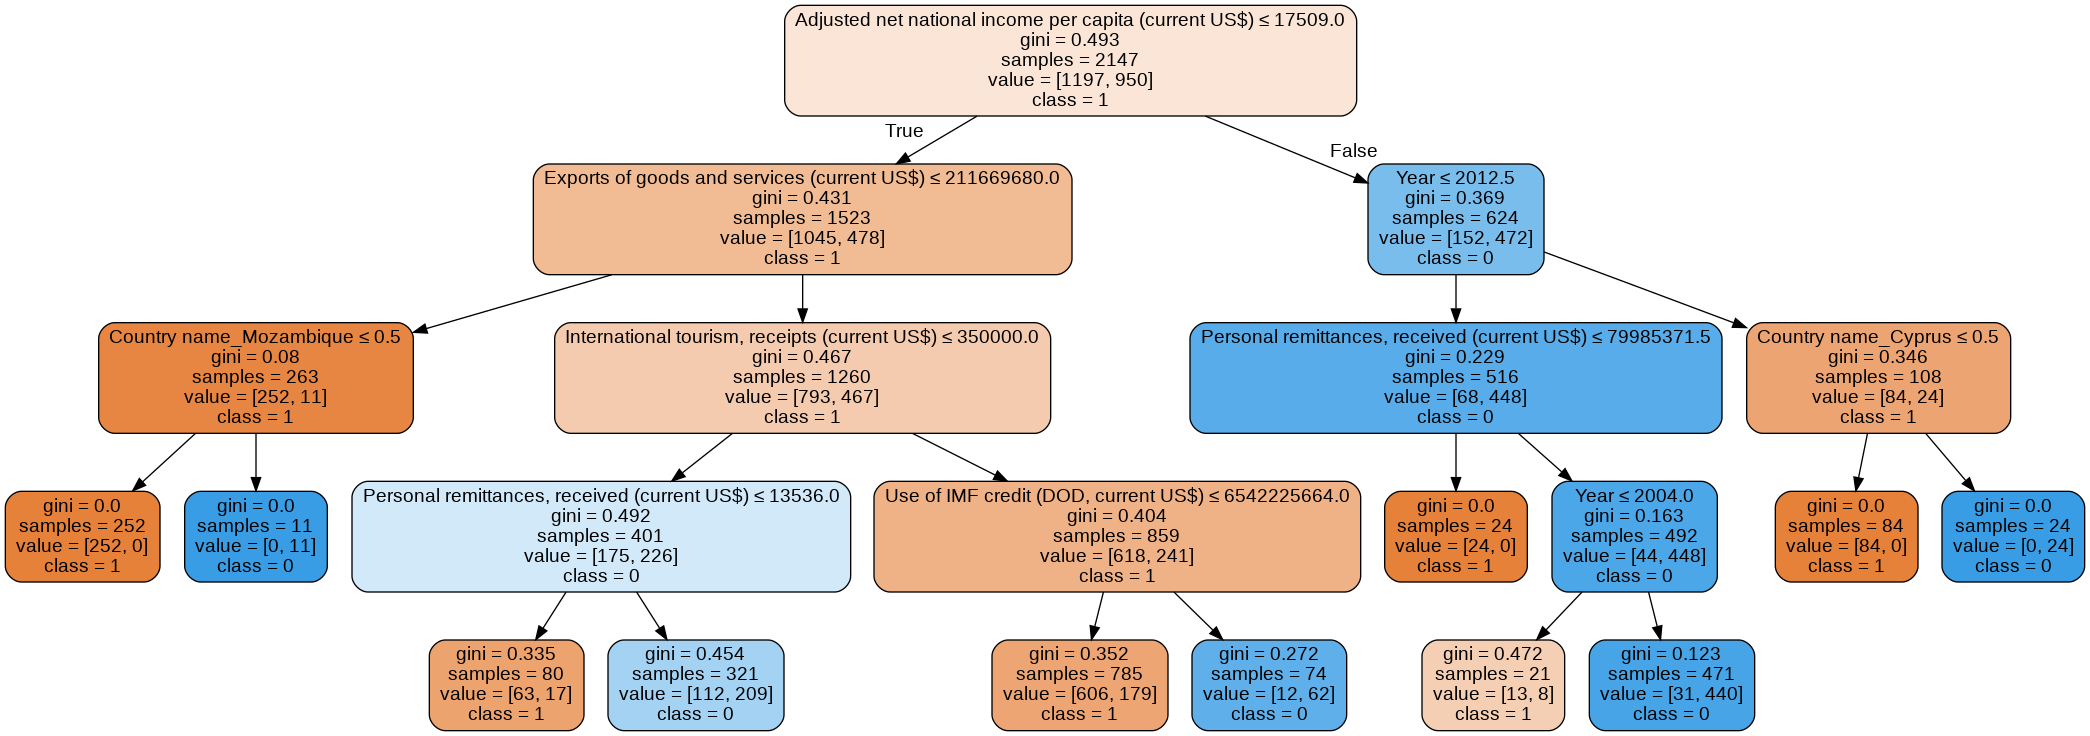

In [ ]:
# Importamos librerías para visualizar el árbol de decisiones

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, class_names=['1','0'],
                feature_names=f_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

In [ ]:
X.iloc[:,[73]]

,Country name_Croatia
0,0
1,0
2,0
3,0
4,0
...,...
2515,0
2516,0
2517,0
2518,0


In [ ]:
# Use score method to get accuracy of model
score = classifier.score(X_test,y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
# Look at classification report to evaluate the model
print(classification_report(y_test, y_pred))

Accuracy Score:  0.8324022346368715
--------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.56      0.41      0.47       294
         1.0       0.46      0.60      0.52       243

    accuracy                           0.50       537
   macro avg       0.51      0.51      0.50       537
weighted avg       0.51      0.50      0.49       537



0.8951177178690406

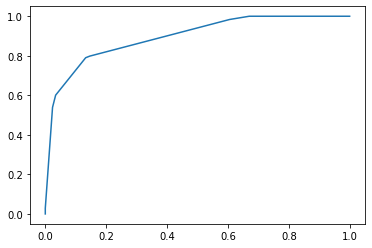

In [ ]:
# Graficar las curva AUC

y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr)
auc

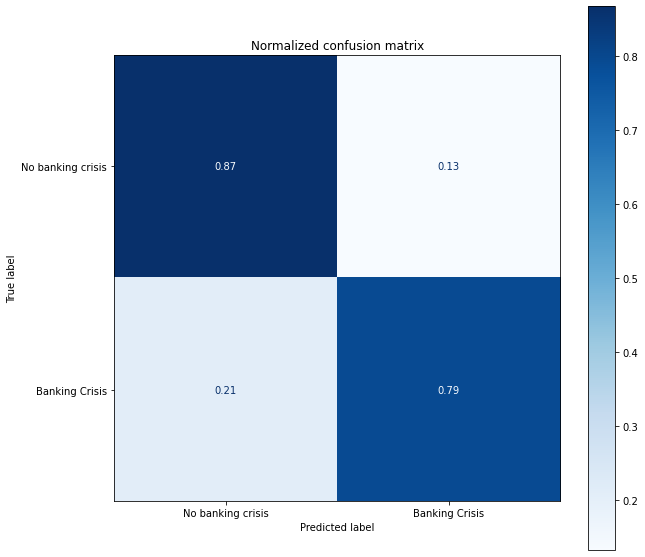

In [ ]:
# Graficamos una matriz de confusión para visualizar el rendimiento de nuestro modelo

class_names = ['No banking crisis','Banking Crisis']
fig, ax = plt.subplots(figsize=(10,10))


plot_confusion_matrix(classifier, X_test, y_test,
                      cmap = plt.cm.Blues,
                      display_labels = class_names,
                      normalize='true',
                      ax=ax)

plt.title("Normalized confusion matrix")
plt.show()